# Installs

In [ ]:
!pip install cloudstorage
!pip install fsspec
!pip install gcsfs 
!pip install -U -q PyDrive

# Imports

In [ ]:
import pandas as pd
from google.colab import auth
import json
import nltk
import numpy as np
from oauth2client.client import GoogleCredentials
import os
import pandas as pd
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
import requests

import logging
import os
import cloudstorage as gcs

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

import spacy
from collections import defaultdict

# Authentication

In [ ]:
!gcloud auth login
!gcloud auth application-default login

Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/auth?response_type=code&client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=openid+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fuserinfo.email+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcloud-platform+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fappengine.admin+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fcompute+https%3A%2F%2Fwww.googleapis.com%2Fauth%2Faccounts.reauth&state=eC8MneDa0Yeo9P5GlGCyjjXtOSXtu7&prompt=consent&access_type=offline&code_challenge=g_JumlfgF68DQCg7wAunmgvHynJSgCEY9N_qn552L_M&code_challenge_method=S256

Enter verification code: 4/1AX4XfWhEdVltnbptf_K2gHW-eExEOy0mIe_LcsJf-5K75av6D6UUNlLEGks

You are now logged in as [robertlouka@berkeley.edu].
Your current project is [None].  You can change this setting by running:
  $ gcloud config set project PROJECT_ID
Go to the following link in your browser:

    https://accounts.google.com/o/oauth2/au

# Read File

In [ ]:
df = pd.read_csv('gs://esgbert_resourses/raw_data/sen_res_10Q_201318.csv')

In [ ]:
df_len = len(df)
df_len

5944

In [ ]:
df.head()

,Unnamed: 0,origin_idx,CIK,date,total_esg_score,total_esg_score_quarter_change_pure,total_esg_score_quarter_change_pct,governance_score_quarter_change_pure,governance_score_quarter_change_pct,social_score_quarter_change_pure,social_score_quarter_change_pct,environment_score_quarter_change_pure,environment_score_quarter_change_pct,quarter,year,month,ReportType,Reports,reports_ordered,reports_cosines
0,0,38,1090872,2016-03-31,70.45,1.51,0.021434,0.01,0.000166,3.34,0.047249,0.00,0.000000,1,2016,3,10Q,0001090872-16-000070.txt : 2016060710-Q 1 a-0...,"In addition, the operation of Dako within Agil...",0.8 0.78 0.78 0.76 0.76 0.76 0.75 0.75 0.75 0....
1,1,41,1090872,2016-06-30,71.96,-2.98,-0.041412,1.20,0.019861,-10.44,-0.141024,5.43,0.066155,2,2016,6,10Q,0001090872-16-000076.txt : 2016090710-Q 1 a-0...,"In addition, the operation of Dako within Agil...",0.8 0.78 0.78 0.76 0.76 0.76 0.75 0.75 0.75 0....
2,2,47,1090872,2016-12-30,68.98,-2.73,-0.039577,0.00,0.000000,-6.05,-0.095141,0.00,0.000000,4,2016,12,10Q,0001090872-17-000004.txt : 2017030810-Q 1 a-0...,Our customers and we are subject to various go...,0.78 0.77 0.76 0.76 0.76 0.76 0.76 0.75 0.75 0...
3,3,50,1090872,2017-03-31,66.25,0.14,0.002113,0.00,0.000000,0.00,0.000000,0.55,0.006285,1,2017,3,10Q,0001090872-17-000008.txt : 2017060610-Q 1 a-0...,Our customers and we are subject to various go...,0.78 0.77 0.76 0.76 0.76 0.76 0.75 0.75 0.75 0...
4,4,53,1090872,2017-06-30,66.39,0.00,0.000000,0.00,0.000000,0.00,0.000000,0.00,0.000000,2,2017,6,10Q,0001090872-17-000013.txt : 2017090610-Q 1 a-0...,Our customers and we are subject to various go...,0.78 0.77 0.76 0.76 0.76 0.75 0.75 0.75 0.75 0...


# EDA

In [ ]:
train_percentage=round(len(df)/100*70)
valid_percentage=round(len(df)/100*20)
print(train_percentage)
print(valid_percentage)

1592
455


#### Cosine Similarity EDA

In [ ]:
train_percentage=round(len(df)/100*70)
valid_percentage=round(len(df)/100*20)
train_df = df.head(train_percentage) 
valid_df = df.iloc[train_percentage:train_percentage+valid_percentage]
test_df=df.iloc[train_percentage+valid_percentage:len(df),:]
print("total size:", len(df))
print("train size:", len(train_df))
print("valid size:", len(valid_df))
print("test size:", len(test_df))

total size: 5944
train size: 4161
valid size: 1189
test size: 594


In [ ]:
train_df = train_df.reset_index()
valid_df = valid_df.reset_index()
test_df = test_df.reset_index()

In [ ]:

#df = pd.read_csv(r'C:/Users/rol/Downloads/test_limited_earnings_call_df_600_605.csv')

cosines_train = []
max_cosines_train = []
third_cosines_train = []
not_three_rows_train = []
cosines_col = train_df.columns.get_loc('reports_cosines')
for index, row in train_df.iterrows():
    cosines_row = train_df.iloc[index, cosines_col]
    #ignore missings
    if type(cosines_row) == str:
        cosines_train.extend(cosines_row.split())
        max_cosines_train.append(max(cosines_row.split()))
        try :
          third_cosines_train.append(cosines_row.split()[2])
        except:
          not_three_rows_train.append(index)

cosines_valid = []
max_cosines_valid = []
third_cosines_valid = []
not_three_rows_valid = []
cosines_col = valid_df.columns.get_loc('reports_cosines')
for index, row in valid_df.iterrows():
    cosines_row = valid_df.iloc[index, cosines_col]
    #ignore missings
    if type(cosines_row) == str:
        cosines_valid.extend(cosines_row.split())
        max_cosines_valid.append(max(cosines_row.split()))
        try :
          third_cosines_valid.append(cosines_row.split()[2])
        except:
          not_three_rows_valid.append(index)

cosines_test = []
max_cosines_test = []
third_cosines_test = []
not_three_rows_test = []
cosines_col = test_df.columns.get_loc('reports_cosines')
for index, row in test_df.iterrows():
    cosines_row = test_df.iloc[index, cosines_col]
    #ignore missings
    if type(cosines_row) == str:
        cosines_test.extend(cosines_row.split())
        max_cosines_test.append(max(cosines_row.split()))
        try :
          third_cosines_test.append(cosines_row.split()[2])
        except:

          not_three_rows_test.append(index)

Text(0.5, 1.05, 'Relative Percentage of Cosines\n By Data Set')

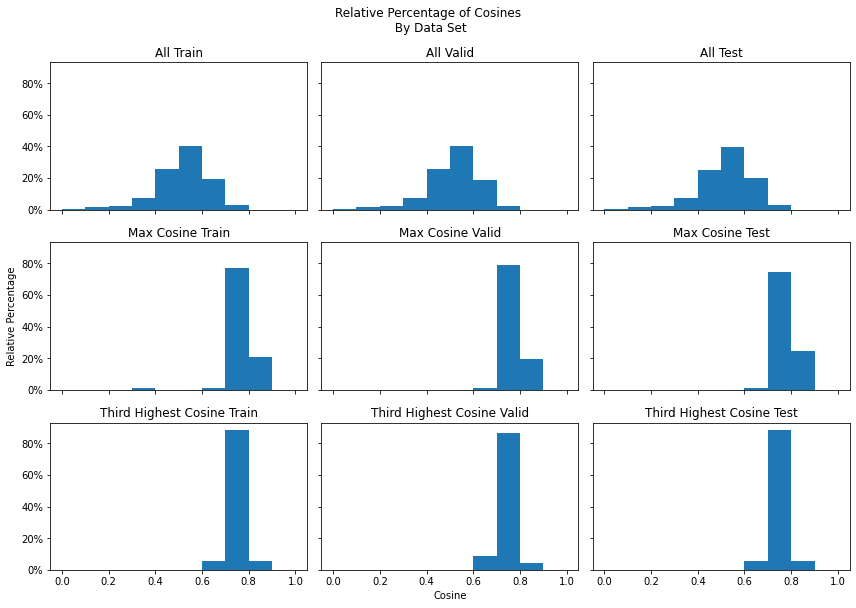

In [ ]:
# train
cosines_train_df = pd.DataFrame(cosines_train)
cosines_train_df.rename(columns={0: 'cosines'}, inplace=True)
cosines_train_df['cosines'] = cosines_train_df['cosines'].astype(float)

max_cosines_train_df = pd.DataFrame(max_cosines_train)
max_cosines_train_df.rename(columns={0: 'max_cosines'}, inplace=True)
max_cosines_train_df['max_cosines'] = max_cosines_train_df['max_cosines'].astype(float)

third_cosines_train_df = pd.DataFrame(third_cosines_train)
third_cosines_train_df.rename(columns={0: 'third_cosines'}, inplace=True)
third_cosines_train_df['third_cosines'] = third_cosines_train_df['third_cosines'].astype(float)

# valid
cosines_valid_df = pd.DataFrame(cosines_valid)
cosines_valid_df.rename(columns={0: 'cosines'}, inplace=True)
cosines_valid_df['cosines'] = cosines_valid_df['cosines'].astype(float)

max_cosines_valid_df = pd.DataFrame(max_cosines_valid)
max_cosines_valid_df.rename(columns={0: 'max_cosines'}, inplace=True)
max_cosines_valid_df['max_cosines'] = max_cosines_valid_df['max_cosines'].astype(float)

third_cosines_valid_df = pd.DataFrame(third_cosines_valid)
third_cosines_valid_df.rename(columns={0: 'third_cosines'}, inplace=True)
third_cosines_valid_df['third_cosines'] = third_cosines_valid_df['third_cosines'].astype(float)

# test
cosines_test_df = pd.DataFrame(cosines_test)
cosines_test_df.rename(columns={0: 'cosines'}, inplace=True)
cosines_test_df['cosines'] = cosines_test_df['cosines'].astype(float)

max_cosines_test_df = pd.DataFrame(max_cosines_test)
max_cosines_test_df.rename(columns={0: 'max_cosines'}, inplace=True)
max_cosines_test_df['max_cosines'] = max_cosines_test_df['max_cosines'].astype(float)

third_cosines_test_df = pd.DataFrame(third_cosines_train)
third_cosines_test_df.rename(columns={0: 'third_cosines'}, inplace=True)
third_cosines_test_df['third_cosines'] = third_cosines_test_df['third_cosines'].astype(float)


fig, ax = plt.subplots(3, 3, figsize=(12,8),sharex=True, sharey=True)

bins = [i/10 for i in range(11)]

# All cosines
ax[0,0].hist(cosines_train_df['cosines'],
        weights=np.zeros_like(cosines_train_df) + 1. / cosines_train_df.size * 100,
        bins=bins)
ax[0,0].set_title('All Train')
#ax[0,0].set_xlabel('Cosine')
ax[0,0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))


ax[0,1].hist(cosines_valid_df['cosines'],
        weights=np.zeros_like(cosines_valid_df) + 1. / cosines_valid_df.size * 100,
        bins=bins)
ax[0,1].set_title('All Valid')
#ax[0,1].set_xlabel('Cosine')
ax[0,1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax[0,2].hist(cosines_test_df['cosines'],
        weights=np.zeros_like(cosines_test_df) + 1. / cosines_test_df.size * 100,
        bins=bins)
ax[0,2].set_title('All Test')
#ax[0,2].set_xlabel('Cosine')
ax[0,2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))


# Max Cosines
ax[1,0].hist(max_cosines_train_df['max_cosines'],
        weights=np.zeros_like(max_cosines_train_df) + 1. / max_cosines_train_df.size * 100,
        bins=bins)
ax[1,0].set_title('Max Cosine Train')
#ax[1,0].set_xlabel('Cosine')
ax[1,0].set_ylabel('Relative Percentage')
ax[1,0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax[1,1].hist(max_cosines_valid_df['max_cosines'],
        weights=np.zeros_like(max_cosines_valid_df) + 1. / max_cosines_valid_df.size * 100,
        bins=bins)
ax[1,1].set_title('Max Cosine Valid')
#ax[1,1].set_xlabel('Cosine')
ax[1,1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax[1,2].hist(max_cosines_test_df['max_cosines'],
        weights=np.zeros_like(max_cosines_test_df) + 1. / max_cosines_test_df.size * 100,
        bins=bins)
ax[1,2].set_title('Max Cosine Test')
#ax[1,2].set_xlabel('Cosine')
ax[1,2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

# Third Cosines
ax[2,0].hist(third_cosines_test_df['third_cosines'],
        weights=np.zeros_like(third_cosines_test_df) + 1. / third_cosines_test_df.size * 100,
        bins=bins)
ax[2,0].set_title('Third Highest Cosine Train')
#ax[2,0].set_xlabel('Cosine')
ax[2,0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax[2,1].hist(third_cosines_valid_df['third_cosines'],
        weights=np.zeros_like(third_cosines_valid_df) + 1. / third_cosines_valid_df.size * 100,
        bins=bins)
ax[2,1].set_title('Third Highest Cosine Valid')
ax[2,1].set_xlabel('Cosine')
ax[2,1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax[2,2].hist(third_cosines_train_df['third_cosines'],
        weights=np.zeros_like(third_cosines_test_df) + 1. / third_cosines_test_df.size * 100,
        bins=bins)
ax[2,2].set_title('Third Highest Cosine Test')
#ax[2,2].set_xlabel('Cosine')
ax[2,2].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

plt.tight_layout()
#fig.tight_layout(rect=[0,0.3,1,0.95])

fig.suptitle('Relative Percentage of Cosines\n By Data Set', y=1.05)

In [ ]:
cosines_train_df.describe()

,cosines
count,3.214092e+06
mean,5.140258e-01
std,1.120076e-01
min,0.000000e+00
25%,4.600000e-01
50%,5.300000e-01
75%,5.900000e-01
max,8.800000e-01


In [ ]:
cosines_valid_df.describe()

,cosines
count,900602.000000
mean,0.513420
std,0.110765
min,0.010000
25%,0.460000
50%,0.520000
75%,0.590000
max,0.870000


In [ ]:
cosines_test_df.describe()

,cosines
count,390179.000000
mean,0.516352
std,0.114104
min,0.010000
25%,0.460000
50%,0.530000
75%,0.590000
max,0.870000


Text(0.5, 1.05, 'Relative Percentage of Quarterly\n Total ESG Score Changes\nBy Data Set')

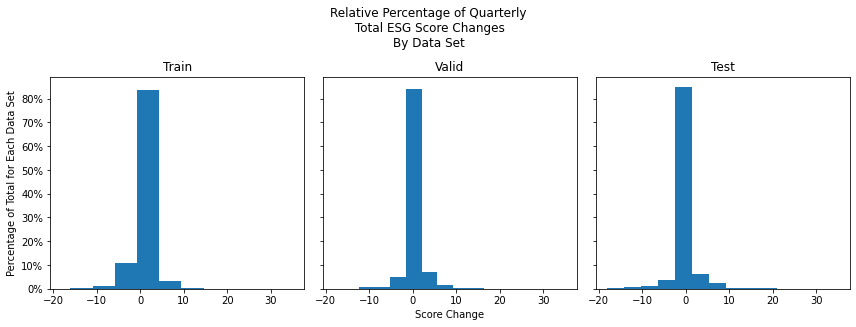

In [ ]:
fig, ax = plt.subplots(1, 3, figsize=(12,6), sharex=True, sharey=True)

bins = [i for i in range(-15, 15)]

# All cosines
ax[0].hist(train_df['environment_score_quarter_change_pure'],
           weights=np.zeros_like(train_df['environment_score_quarter_change_pure']) + 1. / train_df['environment_score_quarter_change_pure'].size * 100)
ax[0].set_title('Train')
#ax[0].set_xlabel('Score Change')
ax[0].set_ylabel('Percentage of Total for Each Data Set')
ax[0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

ax[1].hist(valid_df['environment_score_quarter_change_pure'],
           weights=np.zeros_like(valid_df['environment_score_quarter_change_pure']) + 1. / valid_df['environment_score_quarter_change_pure'].size * 100)
ax[1].set_title('Valid')
ax[1].set_xlabel('Score Change')

ax[2].hist(test_df['environment_score_quarter_change_pure'],
           weights=np.zeros_like(test_df['environment_score_quarter_change_pure']) + 1. / test_df['environment_score_quarter_change_pure'].size * 100)
ax[2].set_title('Test')
#ax[2].set_xlabel('Score Change')

fig.tight_layout(rect=[0,0.3,1,0.95])

fig.suptitle('Relative Percentage of Quarterly\n Total ESG Score Changes\nBy Data Set', y=1.05)

## Parts of Speech

In [ ]:
nlp = spacy.load("en_core_web_sm")

In [ ]:
df2 = df.copy()
df2 = df2.reset_index()
df2['tags'] = ''
df2['POS_orig'] = ''
df2['explain'] = ''
df2['sentences_length'] = ''

In [ ]:
report_col = df2.columns.get_loc('Reports')
tags_col = df2.columns.get_loc('tags')
POS_col = df2.columns.get_loc('POS_orig')
explain_col = df2.columns.get_loc('explain')
sent_len_col = df2.columns.get_loc('sentences_length')
empty_dict = {}

for index, row in df2.iterrows():
  report = df2.iloc[index, report_col]
  if str(report)!='nan':
    doc = nlp(report)
    tags_dict = defaultdict(int)
    pos_dict = defaultdict(int)
    explain_dict = defaultdict(int)
    sent_len = []
    for token in doc:
      tags_dict[token.tag_] +=1
      pos_dict[token.pos_] +=1
      explain_dict[spacy.explain(token.tag_)] +=1
    sentences = list(doc.sents)
    for s in sentences:
      sent_len.append(len(s))
    #print(sent_len)
    #print(type(sent_len))
    #store in dataframe
    df2.iloc[index, tags_col] = [tags_dict]
    df2.iloc[index, POS_col] = [pos_dict]
    if explain_dict!=np.nan:
      df2.iloc[index, explain_col] = [explain_dict]
    else:
      df2.iloc[index, explain_col] = [empty_dict]
    df2.iloc[index, sent_len_col] = ' '.join(str(s) for s in sent_len)
  else:
    df2.iloc[index, tags_col] = [empty_dict]
    df2.iloc[index, POS_col] = [empty_dict]
    df2.iloc[index, explain_col] = [empty_dict]
  

In [ ]:
pos_df = pd.json_normalize(df2['POS_orig'])
pos_df.head()

,SPACE,NUM,PUNCT,NOUN,PROPN,ADP,CCONJ,SYM,DET,ADJ,INTJ,VERB,SCONJ,AUX,PART,X,ADV,PRON
0,2192,2085,3463,8296.0,1882.0,3649.0,1478.0,293.0,3078.0,2640.0,5.0,3316.0,414.0,841.0,572.0,7.0,629.0,450.0
1,2311,2185,3664,8758.0,2045.0,3888.0,1521.0,313.0,3295.0,2787.0,5.0,3538.0,427.0,891.0,603.0,10.0,694.0,480.0
2,1959,1627,3179,7569.0,1734.0,3284.0,1240.0,252.0,2822.0,2490.0,6.0,3016.0,405.0,766.0,510.0,11.0,539.0,435.0
3,2394,1995,3262,7802.0,1745.0,3450.0,1398.0,293.0,2915.0,2525.0,6.0,3091.0,368.0,768.0,515.0,7.0,599.0,424.0
4,2426,1935,3258,7835.0,1741.0,3484.0,1384.0,273.0,2970.0,2599.0,6.0,3122.0,376.0,785.0,508.0,8.0,600.0,431.0


In [ ]:
tags_df = pd.json_normalize(df2['tags'])
tags_df.head()

,_SP,CD,:,NNS,NNP,IN,CC,",",NN,-LRB-,-RRB-,SYM,DT,.,JJ,HYPH,PRP$,UH,VBG,VBN,VB,VBZ,TO,NNPS,JJR,VBD,LS,RB,XX,VBP,JJS,POS,PRP,$,``,'',WDT,MD,RBR,EX,RBS,WRB,FW,RP,WP,WP$,PDT,NFP,ADD,AFX
0,2192,2085,137,3239.0,1787.0,4051.0,1478.0,1624.0,5057.0,244.0,250.0,11.0,2235.0,954.0,2580.0,169.0,659.0,5.0,460.0,1265.0,851.0,280.0,379.0,95.0,50.0,454.0,4.0,656.0,1.0,509.0,10.0,72.0,409.0,282.0,42.0,43.0,177.0,338.0,16.0,35.0,8.0,70.0,2.0,12.0,6.0,3.0,4.0,NaN,NaN,NaN
1,2311,2185,140,3384.0,1945.0,4303.0,1521.0,1697.0,5374.0,261.0,267.0,15.0,2430.0,1014.0,2725.0,190.0,682.0,5.0,483.0,1370.0,898.0,297.0,405.0,100.0,52.0,503.0,7.0,716.0,1.0,532.0,10.0,75.0,437.0,298.0,45.0,50.0,177.0,346.0,16.0,37.0,8.0,77.0,2.0,12.0,6.0,3.0,3.0,NaN,NaN,NaN
2,1959,1627,119,2931.0,1638.0,3680.0,1240.0,1437.0,4638.0,229.0,237.0,11.0,2000.0,895.0,2433.0,175.0,649.0,6.0,397.0,1122.0,800.0,279.0,348.0,96.0,44.0,382.0,7.0,564.0,2.0,479.0,13.0,59.0,389.0,241.0,42.0,44.0,162.0,323.0,13.0,41.0,5.0,60.0,2.0,9.0,5.0,3.0,8.0,1.0,NaN,NaN
3,2394,1995,114,3070.0,1654.0,3810.0,1398.0,1580.0,4732.0,199.0,205.0,11.0,2087.0,915.0,2471.0,163.0,655.0,6.0,388.0,1224.0,804.0,251.0,352.0,91.0,43.0,402.0,6.0,621.0,1.0,469.0,11.0,59.0,378.0,282.0,42.0,44.0,162.0,321.0,9.0,41.0,5.0,68.0,NaN,8.0,5.0,3.0,8.0,NaN,NaN,NaN
4,2426,1935,117,3111.0,1647.0,3851.0,1384.0,1567.0,4724.0,201.0,208.0,10.0,2132.0,925.0,2534.0,151.0,661.0,6.0,392.0,1248.0,808.0,253.0,348.0,94.0,53.0,408.0,7.0,617.0,1.0,471.0,12.0,56.0,385.0,263.0,43.0,45.0,166.0,327.0,11.0,41.0,5.0,71.0,NaN,9.0,5.0,3.0,8.0,1.0,NaN,NaN


In [ ]:
explain_df =  pd.json_normalize(df2['explain'])
explain_df.head()

,NaN,cardinal number,"punctuation mark, colon or ellipsis","noun, plural","noun, proper singular","conjunction, subordinating or preposition","conjunction, coordinating","punctuation mark, comma","noun, singular or mass",left round bracket,right round bracket,symbol,determiner,"punctuation mark, sentence closer",adjective,"punctuation mark, hyphen","pronoun, possessive",interjection,"verb, gerund or present participle","verb, past participle","verb, base form","verb, 3rd person singular present","infinitival ""to""","noun, proper plural","adjective, comparative","verb, past tense",list item marker,adverb,unknown,"verb, non-3rd person singular present","adjective, superlative",possessive ending,"pronoun, personal","symbol, currency",opening quotation mark,closing quotation mark,wh-determiner,"verb, modal auxiliary","adverb, comparative",existential there,"adverb, superlative",wh-adverb,foreign word,"adverb, particle","wh-pronoun, personal","wh-pronoun, possessive",predeterminer,superfluous punctuation,email,affix
0,2192,2085,137,3239.0,1787.0,4051.0,1478.0,1624.0,5057.0,244.0,250.0,11.0,2235.0,954.0,2580.0,169.0,659.0,5.0,460.0,1265.0,851.0,280.0,379.0,95.0,50.0,454.0,4.0,656.0,1.0,509.0,10.0,72.0,409.0,282.0,42.0,43.0,177.0,338.0,16.0,35.0,8.0,70.0,2.0,12.0,6.0,3.0,4.0,NaN,NaN,NaN
1,2311,2185,140,3384.0,1945.0,4303.0,1521.0,1697.0,5374.0,261.0,267.0,15.0,2430.0,1014.0,2725.0,190.0,682.0,5.0,483.0,1370.0,898.0,297.0,405.0,100.0,52.0,503.0,7.0,716.0,1.0,532.0,10.0,75.0,437.0,298.0,45.0,50.0,177.0,346.0,16.0,37.0,8.0,77.0,2.0,12.0,6.0,3.0,3.0,NaN,NaN,NaN
2,1959,1627,119,2931.0,1638.0,3680.0,1240.0,1437.0,4638.0,229.0,237.0,11.0,2000.0,895.0,2433.0,175.0,649.0,6.0,397.0,1122.0,800.0,279.0,348.0,96.0,44.0,382.0,7.0,564.0,2.0,479.0,13.0,59.0,389.0,241.0,42.0,44.0,162.0,323.0,13.0,41.0,5.0,60.0,2.0,9.0,5.0,3.0,8.0,1.0,NaN,NaN
3,2394,1995,114,3070.0,1654.0,3810.0,1398.0,1580.0,4732.0,199.0,205.0,11.0,2087.0,915.0,2471.0,163.0,655.0,6.0,388.0,1224.0,804.0,251.0,352.0,91.0,43.0,402.0,6.0,621.0,1.0,469.0,11.0,59.0,378.0,282.0,42.0,44.0,162.0,321.0,9.0,41.0,5.0,68.0,NaN,8.0,5.0,3.0,8.0,NaN,NaN,NaN
4,2426,1935,117,3111.0,1647.0,3851.0,1384.0,1567.0,4724.0,201.0,208.0,10.0,2132.0,925.0,2534.0,151.0,661.0,6.0,392.0,1248.0,808.0,253.0,348.0,94.0,53.0,408.0,7.0,617.0,1.0,471.0,12.0,56.0,385.0,263.0,43.0,45.0,166.0,327.0,11.0,41.0,5.0,71.0,NaN,9.0,5.0,3.0,8.0,1.0,NaN,NaN


In [ ]:
pos_cols = pos_df.columns
tags_cols = tags_df.columns
explain_cols = [col for col in explain_df.columns if col != None]

In [ ]:
#not set(pos_cols).isdisjoint(explain_cols)
list(set(pos_cols) & set(tags_cols))

['SYM']

In [ ]:
list(set(pos_cols) & set(explain_cols))

[]

In [ ]:
list(set(tags_cols) & set(explain_cols))

[]

In [ ]:
tags_df.rename(columns={'SYM': 'SYM_'}, inplace=True)

In [ ]:
spacy_df = df2.merge(pos_df, how='inner', left_index=True, right_index=True)\
.merge(tags_df, how='inner', left_index=True, right_index=True)\
.merge(explain_df, how='inner', left_index=True, right_index=True)

In [ ]:
#fill na's
for col in pos_cols:
  spacy_df[col] = spacy_df[col].fillna(0)
for col in tags_cols:
  spacy_df[col] = spacy_df[col].fillna(0)
for col in explain_cols:
  spacy_df[col] = spacy_df[col].fillna(0)

In [ ]:
spacy_df['POS_total'] = spacy_df[pos_cols].sum(axis=1)
spacy_df['tags_total'] = spacy_df[tags_cols].sum(axis=1)
spacy_df['explain_total'] = spacy_df[explain_cols].sum(axis=1)

In [ ]:
[col for col in spacy_df.columns if '_x' in str(col)]

[]

In [ ]:
len(train_df)

4161

In [ ]:
len(valid_df)

1189

In [ ]:
len(test_df)

594

In [ ]:
train_df2 = spacy_df.merge(train_df, how='inner', on=['CIK','date'], suffixes=['', '_delcol'])
keep_cols = [col for col in train_df2.columns if '_delcol' not in str(col)]
train_df2 = train_df2[keep_cols]
print(len(train_df2))
train_df2.head()

4161


,index,Unnamed: 0,origin_idx,CIK,date,total_esg_score,total_esg_score_quarter_change_pure,total_esg_score_quarter_change_pct,governance_score_quarter_change_pure,governance_score_quarter_change_pct,social_score_quarter_change_pure,social_score_quarter_change_pct,environment_score_quarter_change_pure,environment_score_quarter_change_pct,quarter,year,month,ReportType,Reports,reports_ordered,reports_cosines,tags,POS_orig,explain,sentences_length,SPACE,NUM,PUNCT,NOUN,PROPN,ADP,CCONJ,SYM,DET,ADJ,INTJ,VERB,SCONJ,AUX,PART,...,"punctuation mark, sentence closer",adjective,"punctuation mark, hyphen","pronoun, possessive",interjection,"verb, gerund or present participle","verb, past participle","verb, base form","verb, 3rd person singular present","infinitival ""to""","noun, proper plural","adjective, comparative","verb, past tense",list item marker,adverb,unknown,"verb, non-3rd person singular present","adjective, superlative",possessive ending,"pronoun, personal","symbol, currency",opening quotation mark,closing quotation mark,wh-determiner,"verb, modal auxiliary","adverb, comparative",existential there,"adverb, superlative",wh-adverb,foreign word,"adverb, particle","wh-pronoun, personal","wh-pronoun, possessive",predeterminer,superfluous punctuation,email,affix,POS_total,tags_total,explain_total
0,0,0,38,1090872,2016-03-31,70.45,1.51,0.021434,0.01,0.000166,3.34,0.047249,0.00,0.000000,1,2016,3,10Q,0001090872-16-000070.txt : 2016060710-Q 1 a-0...,"In addition, the operation of Dako within Agil...",0.8 0.78 0.78 0.76 0.76 0.76 0.75 0.75 0.75 0....,"{'_SP': 2192, 'CD': 2085, ':': 137, 'NNS': 323...","{'SPACE': 2192, 'NUM': 2085, 'PUNCT': 3463, 'N...","{None: 2192, 'cardinal number': 2085, 'punctua...",3 21 17 2 9 10 9 2 9 9 3 45 3 11 2 8 4 13 4 89...,2192,2085,3463,8296.0,1882.0,3649.0,1478.0,293.0,3078.0,2640.0,5.0,3316.0,414.0,841.0,572.0,...,954.0,2580.0,169.0,659.0,5.0,460.0,1265.0,851.0,280.0,379.0,95.0,50.0,454.0,4.0,656.0,1.0,509.0,10.0,72.0,409.0,282.0,42.0,43.0,177.0,338.0,16.0,35.0,8.0,70.0,2.0,12.0,6.0,3.0,4.0,0.0,0.0,0.0,35290.0,35572.0,33098.0
1,1,1,41,1090872,2016-06-30,71.96,-2.98,-0.041412,1.20,0.019861,-10.44,-0.141024,5.43,0.066155,2,2016,6,10Q,0001090872-16-000076.txt : 2016090710-Q 1 a-0...,"In addition, the operation of Dako within Agil...",0.8 0.78 0.78 0.76 0.76 0.76 0.75 0.75 0.75 0....,"{'_SP': 2311, 'CD': 2185, ':': 140, 'NNS': 338...","{'SPACE': 2311, 'NUM': 2185, 'PUNCT': 3664, 'N...","{None: 2311, 'cardinal number': 2185, 'punctua...",24 17 2 9 15 4 2 9 9 3 45 3 11 2 8 4 13 4 89 4...,2311,2185,3664,8758.0,2045.0,3888.0,1521.0,313.0,3295.0,2787.0,5.0,3538.0,427.0,891.0,603.0,...,1014.0,2725.0,190.0,682.0,5.0,483.0,1370.0,898.0,297.0,405.0,100.0,52.0,503.0,7.0,716.0,1.0,532.0,10.0,75.0,437.0,298.0,45.0,50.0,177.0,346.0,16.0,37.0,8.0,77.0,2.0,12.0,6.0,3.0,3.0,0.0,0.0,0.0,37415.0,37713.0,35104.0
2,2,2,47,1090872,2016-12-30,68.98,-2.73,-0.039577,0.00,0.000000,-6.05,-0.095141,0.00,0.000000,4,2016,12,10Q,0001090872-17-000004.txt : 2017030810-Q 1 a-0...,Our customers and we are subject to various go...,0.78 0.77 0.76 0.76 0.76 0.76 0.76 0.75 0.75 0...,"{'_SP': 1959, 'NFP': 1, ':': 119, 'NNS': 2931,...","{'SPACE': 1959, 'PUNCT': 3179, 'NOUN': 7569, '...","{None: 1959, 'superfluous punctuation': 1, 'pu...",3 21 17 2 9 10 9 2 9 9 3 45 3 11 2 8 4 13 4 89...,1959,1627,3179,7569.0,1734.0,3284.0,1240.0,252.0,2822.0,2490.0,6.0,3016.0,405.0,766.0,510.0,...,895.0,2433.0,175.0,649.0,6.0,397.0,1122.0,800.0,279.0,348.0,96.0,44.0,382.0,7.0,564.0,2.0,479.0,13.0,59.0,389.0,241.0,42.0,44.0,162.0,323.0,13.0,41.0,5.0,60.0,2.0,9.0,5.0,3.0,8.0,1.0,0.0,0.0,31844.0,32085.0,29885.0
3,3,3,50,1090872,2017-03-31,66.25,0.14,0.002113,0.00,0.000000,0.00,0.000000,0.55,0.006285,1,2017,3,10Q,0001090872-17-000008.txt : 2017060610-Q 1 a-0...,Our customers and we are subject to various go...,0.78 0.77 0.76 0.76 0.76 0.76 0.75 0.75 0.75 0...,"{'_SP': 2394, 'RB': 621, ':': 114, 'NNS': 3070...","{'SPACE': 2394, 'ADV': 599, 'PUNCT': 3262, 'NO...","{None: 2

In [ ]:
valid_df2 = spacy_df.merge(valid_df, how='inner', on=['CIK','date'], suffixes=['', '_delcol'])
keep_cols = [col for col in train_df2.columns if '_delcol' not in str(col)]
valid_df2 = valid_df2[keep_cols]
print(len(valid_df2))
valid_df2.head()

1189


,index,Unnamed: 0,origin_idx,CIK,date,total_esg_score,total_esg_score_quarter_change_pure,total_esg_score_quarter_change_pct,governance_score_quarter_change_pure,governance_score_quarter_change_pct,social_score_quarter_change_pure,social_score_quarter_change_pct,environment_score_quarter_change_pure,environment_score_quarter_change_pct,quarter,year,month,ReportType,Reports,reports_ordered,reports_cosines,tags,POS_orig,explain,sentences_length,SPACE,NUM,PUNCT,NOUN,PROPN,ADP,CCONJ,SYM,DET,ADJ,INTJ,VERB,SCONJ,AUX,PART,...,"punctuation mark, sentence closer",adjective,"punctuation mark, hyphen","pronoun, possessive",interjection,"verb, gerund or present participle","verb, past participle","verb, base form","verb, 3rd person singular present","infinitival ""to""","noun, proper plural","adjective, comparative","verb, past tense",list item marker,adverb,unknown,"verb, non-3rd person singular present","adjective, superlative",possessive ending,"pronoun, personal","symbol, currency",opening quotation mark,closing quotation mark,wh-determiner,"verb, modal auxiliary","adverb, comparative",existential there,"adverb, superlative",wh-adverb,foreign word,"adverb, particle","wh-pronoun, personal","wh-pronoun, possessive",predeterminer,superfluous punctuation,email,affix,POS_total,tags_total,explain_total
0,4161,1188,12174,51434,2015-09-30,64.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,3,2015,9,10Q,0000051434-15-000036.txt : 2015110910-Q 1 ip-...,The components of the net provision related to...,0.75 0.75 0.73 0.73 0.73 0.71 0.69 0.69 0.69 0...,"{'_SP': 2927, 'CD': 2244, ':': 88, 'NN': 3311,...","{'SPACE': 2927, 'NUM': 2244, 'PUNCT': 2361, 'N...","{None: 2927, 'cardinal number': 2244, 'punctua...",3 1 20 10 2 8 18 2 8 48 13 11 16 4 67 2 74 2 3...,2927,2244,2361,5163.0,2319.0,3072.0,712.0,509.0,2184.0,1964.0,3.0,1937.0,251.0,695.0,323.0,...,749.0,1753.0,141.0,107.0,3.0,305.0,920.0,301.0,253.0,186.0,155.0,210.0,565.0,33.0,419.0,0.0,211.0,1.0,95.0,54.0,480.0,11.0,11.0,112.0,77.0,17.0,6.0,5.0,6.0,1.0,7.0,3.0,1.0,0.0,0.0,0.0,0.0,27166.0,27646.0,24239.0
1,4162,1189,12211,51644,2013-03-28,60.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1,2013,3,10Q,0000051644-13-000014.txt : 2013042510-Q 1 ipg...,CRITICAL ACCOUNTING ESTIMATES Our significan...,0.76 0.73 0.73 0.72 0.71 0.71 0.69 0.69 0.69 0...,"{'_SP': 1300, 'CD': 584, ':': 32, 'NNS': 1190,...","{'SPACE': 1300, 'NUM': 584, 'PUNCT': 1350, 'NO...","{None: 1300, 'cardinal number': 584, 'punctuat...",3 2 2 14 7 13 12 18 8 13 30 89 2 73 2 31 28 46...,1300,584,1350,2929.0,1092.0,1653.0,477.0,101.0,1261.0,1096.0,6.0,1155.0,182.0,314.0,154.0,...,365.0,1063.0,63.0,298.0,6.0,155.0,508.0,206.0,146.0,112.0,89.0,23.0,153.0,3.0,278.0,0.0,250.0,10.0,13.0,174.0,97.0,16.0,15.0,82.0,51.0,3.0,10.0,13.0,25.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,14131.0,14228.0,12831.0
2,4163,1190,12214,51644,2013-06-28,60.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,2,2013,6,10Q,0000051644-13-000025.txt : 2013072510-Q 1 ipg...,CRITICAL ACCOUNTING ESTIMATES Our significan...,0.76 0.73 0.73 0.72 0.71 0.71 0.7 0.69 0.69 0....,"{'_SP': 1572, 'RB': 339, ':': 33, 'NNS': 1270,...","{'SPACE': 1572, 'ADV': 360, 'PUNCT': 1522, 'NO...","{None: 1572, 'adverb': 339, 'punctuation mark,...",3 1 4 14 7 13 12 18 8 13 30 89 2 73 2 31 28 46...,1572,717,1522,3344.0,1174.0,1987.0,540.0,140.0,1472.0,1289.0,6.0,1253.0,180.0,336.0,164.0,...,404.0,1251.0,69.0,325.0,6.0,177.0,559.0,210.0,149.0,119.0,99.0,29.0,198.0,3.0,339.0,0.0,246.0,9.0,14.0,181.0,136.0,20.0,19.0,89.0,50.0,3.0,12.0,20.0,29.0,0.0,10.0,0.0,0.0,1.0,0.0,0.0,0.0,16252.0,16388.0,14680.0
3,4164,1191,12217,51644,2013-09-30,60.0,1.0,0.016667,-2.0,-0.027027,4.0,0.072727,0.0,0.000000,3,2013,9,10Q,0000051644-13-000039.txt : 2013102410-Q 1 ipg...,CRITICAL ACCOUNTING ESTIMATES Our significan...,0.76 0.73 0.73 0.72 0.71 0.71 0.7 0.69 0.69 0....,"{'_SP': 1739, 'NNP': 1435, ':': 34, 'NNS': 138...","{'SPACE': 1739, 'PROPN': 1567, 'PUNCT': 1753, ...","{None: 1739, 'noun, proper singular': 

In [ ]:
test_df2 = spacy_df.merge(test_df, how='inner', on=['CIK','date'], suffixes=['', '_delcol'])
keep_cols = [col for col in test_df2.columns if '_delcol' not in str(col)]
test_df2 = test_df2[keep_cols]
print(len(test_df2))
test_df2.head()

594


,index,Unnamed: 0,origin_idx,CIK,date,total_esg_score,total_esg_score_quarter_change_pure,total_esg_score_quarter_change_pct,governance_score_quarter_change_pure,governance_score_quarter_change_pct,social_score_quarter_change_pure,social_score_quarter_change_pct,environment_score_quarter_change_pure,environment_score_quarter_change_pct,quarter,year,month,ReportType,Reports,reports_ordered,reports_cosines,tags,POS_orig,explain,sentences_length,SPACE,NUM,PUNCT,NOUN,PROPN,ADP,CCONJ,SYM,DET,ADJ,INTJ,VERB,SCONJ,AUX,PART,...,"punctuation mark, sentence closer",adjective,"punctuation mark, hyphen","pronoun, possessive",interjection,"verb, gerund or present participle","verb, past participle","verb, base form","verb, 3rd person singular present","infinitival ""to""","noun, proper plural","adjective, comparative","verb, past tense",list item marker,adverb,unknown,"verb, non-3rd person singular present","adjective, superlative",possessive ending,"pronoun, personal","symbol, currency",opening quotation mark,closing quotation mark,wh-determiner,"verb, modal auxiliary","adverb, comparative",existential there,"adverb, superlative",wh-adverb,foreign word,"adverb, particle","wh-pronoun, personal","wh-pronoun, possessive",predeterminer,superfluous punctuation,email,affix,POS_total,tags_total,explain_total
0,5350,2377,23650,899689,2013-09-30,58.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,3,2013,9,10Q,0000899689-13-000037.txt : 2013110410-Q 1 vno...,"In addition, the quarters ended September30, 2...",0.7 0.69 0.69 0.69 0.69 0.68 0.68 0.68 0.67 0....,"{'_SP': 1280, 'CD': 1662, ':': 63, 'NNP': 2272...","{'SPACE': 1280, 'NUM': 1662, 'PUNCT': 2508, 'P...","{None: 1280, 'cardinal number': 1662, 'punctua...",3 2 14 5 8 5 15 12 17 7 20 5 7 13 91 4 74 4 34...,1280,1662,2508,4150.0,2415.0,2444.0,656.0,425.0,1657.0,1369.0,12.0,1588.0,172.0,441.0,168.0,...,580.0,1334.0,130.0,226.0,12.0,238.0,714.0,217.0,184.0,95.0,143.0,26.0,330.0,18.0,359.0,4.0,283.0,9.0,30.0,203.0,410.0,0.0,0.0,141.0,63.0,8.0,7.0,0.0,4.0,3.0,11.0,1.0,0.0,2.0,0.0,2.0,0.0,21513.0,21923.0,20233.0
1,5351,2378,23656,899689,2014-03-31,58.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,1,2014,3,10Q,0000899689-14-000028.txt : 2014050510-Q 1 vno...,35 Overview continued 36 37 ...,0.72 0.69 0.69 0.68 0.68 0.67 0.67 0.66 0.66 0...,"{'_SP': 973, 'CD': 1072, ':': 50, 'NNS': 1186,...","{'SPACE': 973, 'NUM': 1072, 'PUNCT': 1809, 'NO...","{None: 973, 'cardinal number': 1072, 'punctuat...",5 14 5 8 5 15 12 17 7 20 5 7 13 91 4 74 4 34 2...,973,1072,1809,3228.0,1776.0,1821.0,550.0,252.0,1276.0,1045.0,8.0,1277.0,157.0,364.0,167.0,...,450.0,1011.0,91.0,197.0,8.0,201.0,558.0,218.0,177.0,96.0,99.0,25.0,190.0,14.0,266.0,4.0,232.0,9.0,28.0,143.0,213.0,0.0,1.0,112.0,65.0,3.0,8.0,1.0,5.0,3.0,13.0,1.0,0.0,2.0,7.0,0.0,0.0,16180.0,16393.0,15207.0
2,5352,2379,23659,899689,2014-06-30,58.0,0.0,0.000000,0.0,0.000000,0.0,0.000000,0.0,0.000000,2,2014,6,10Q,0000899689-14-000043.txt : 2014080410-Q 1 vno...,40 Overview continued 41 42 ...,0.72 0.69 0.68 0.67 0.67 0.67 0.66 0.65 0.65 0...,"{'_SP': 1162, 'RB': 336, ':': 60, 'NNS': 1434,...","{'SPACE': 1162, 'ADV': 300, 'PUNCT': 2286, 'NO...","{None: 1162, 'adverb': 336, 'punctuation mark,...",5 14 5 8 5 15 12 17 7 20 5 7 13 91 4 74 4 34 2...,1162,1563,2286,3991.0,2188.0,2272.0,654.0,398.0,1568.0,1278.0,10.0,1570.0,158.0,409.0,210.0,...,558.0,1234.0,109.0,224.0,10.0,235.0,666.0,251.0,209.0,124.0,117.0,31.0,297.0,15.0,336.0,4.0,256.0,13.0,41.0,166.0,339.0,2.0,1.0,140.0,65.0,4.0,7.0,1.0,4.0,4.0,12.0,3.0,0.0,3.0,0.0,1.0,0.0,20217.0,20556.0,19055.0
3,5353,2380,23662,899689,2014-09-30,58.0,4.0,0.068966,-2.0,-0.033333,5.0,0.113636,7.0,0.104478,3,2014,9,10Q,0000899689-14-000050.txt : 2014110310-Q 1 vno...,For further discussion of factors that couldma...,0.73 0.69 0.69 0.68 0.68 0.67 0.67 0.67 0.66 0...,"{'_SP': 1276, 'RB': 361, ':': 55, 'NNS': 1522,...","{'SPACE': 1276, 'ADV': 321, 'PUNCT': 2481, 'NO...","{None: 1276, 'adverb': 361, 'punctuation mark,...",5 14 5 8 5 15

In [ ]:
train_df2[pos_cols]

,SPACE,NUM,PUNCT,NOUN,PROPN,ADP,CCONJ,SYM,DET,ADJ,INTJ,VERB,SCONJ,AUX,PART,X,ADV,PRON
0,2192,2085,3463,8296.0,1882.0,3649.0,1478.0,293.0,3078.0,2640.0,5.0,3316.0,414.0,841.0,572.0,7.0,629.0,450.0
1,2311,2185,3664,8758.0,2045.0,3888.0,1521.0,313.0,3295.0,2787.0,5.0,3538.0,427.0,891.0,603.0,10.0,694.0,480.0
2,1959,1627,3179,7569.0,1734.0,3284.0,1240.0,252.0,2822.0,2490.0,6.0,3016.0,405.0,766.0,510.0,11.0,539.0,435.0
3,2394,1995,3262,7802.0,1745.0,3450.0,1398.0,293.0,2915.0,2525.0,6.0,3091.0,368.0,768.0,515.0,7.0,599.0,424.0
4,2426,1935,3258,7835.0,1741.0,3484.0,1384.0,273.0,2970.0,2599.0,6.0,3122.0,376.0,785.0,508.0,8.0,600.0,431.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,2868,1976,2326,5171.0,2298.0,3055.0,667.0,442.0,2214.0,1948.0,3.0,1952.0,250.0,669.0,298.0,27.0,408.0,68.0
4157,2965,2224,2342,5253.0,2323.0,3181.0,714.0,487.0,2285.0,2015.0,3.0,1989.0,269.0,687.0,316.0,27.0,404.0,64.0
4158,2970,2336,2420,5321.0,2334.0,3152.0,703.0,527.0,2203.0,1973.0,3.0,2019.0,267.0,708.0,310.0,34.0,396.0,69.0
4159,2423,1644,2031,4340.0,1937.0,2532.0,585.0,365.0,1774.0,1690.0,3.0,1632.0,212.0,612.0,276.0,28.0,369.0,59.0


In [ ]:
train_df2[tags_cols]

,_SP,CD,:,NNS,NNP,IN,CC,",",NN,-LRB-,-RRB-,SYM,DT,.,JJ,HYPH,PRP$,UH,VBG,VBN,VB,VBZ,TO,NNPS,JJR,VBD,LS,RB,XX,VBP,JJS,POS,PRP,$,``,'',WDT,MD,RBR,EX,RBS,WRB,FW,RP,WP,WP$,PDT,NFP,ADD,AFX
0,2192,2085,137,3239.0,1787.0,4051.0,1478.0,1624.0,5057.0,244.0,250.0,293.0,2235.0,954.0,2580.0,169.0,659.0,5.0,460.0,1265.0,851.0,280.0,379.0,95.0,50.0,454.0,4.0,656.0,1.0,509.0,10.0,72.0,409.0,282.0,42.0,43.0,177.0,338.0,16.0,35.0,8.0,70.0,2.0,12.0,6.0,3.0,4.0,0.0,0.0,0.0
1,2311,2185,140,3384.0,1945.0,4303.0,1521.0,1697.0,5374.0,261.0,267.0,313.0,2430.0,1014.0,2725.0,190.0,682.0,5.0,483.0,1370.0,898.0,297.0,405.0,100.0,52.0,503.0,7.0,716.0,1.0,532.0,10.0,75.0,437.0,298.0,45.0,50.0,177.0,346.0,16.0,37.0,8.0,77.0,2.0,12.0,6.0,3.0,3.0,0.0,0.0,0.0
2,1959,1627,119,2931.0,1638.0,3680.0,1240.0,1437.0,4638.0,229.0,237.0,252.0,2000.0,895.0,2433.0,175.0,649.0,6.0,397.0,1122.0,800.0,279.0,348.0,96.0,44.0,382.0,7.0,564.0,2.0,479.0,13.0,59.0,389.0,241.0,42.0,44.0,162.0,323.0,13.0,41.0,5.0,60.0,2.0,9.0,5.0,3.0,8.0,1.0,0.0,0.0
3,2394,1995,114,3070.0,1654.0,3810.0,1398.0,1580.0,4732.0,199.0,205.0,293.0,2087.0,915.0,2471.0,163.0,655.0,6.0,388.0,1224.0,804.0,251.0,352.0,91.0,43.0,402.0,6.0,621.0,1.0,469.0,11.0,59.0,378.0,282.0,42.0,44.0,162.0,321.0,9.0,41.0,5.0,68.0,0.0,8.0,5.0,3.0,8.0,0.0,0.0,0.0
4,2426,1935,117,3111.0,1647.0,3851.0,1384.0,1567.0,4724.0,201.0,208.0,273.0,2132.0,925.0,2534.0,151.0,661.0,6.0,392.0,1248.0,808.0,253.0,348.0,94.0,53.0,408.0,7.0,617.0,1.0,471.0,12.0,56.0,385.0,263.0,43.0,45.0,166.0,327.0,11.0,41.0,5.0,71.0,0.0,9.0,5.0,3.0,8.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4156,2868,1976,96,1773.0,2186.0,3295.0,667.0,845.0,3398.0,250.0,251.0,442.0,1982.0,723.0,1750.0,147.0,112.0,3.0,324.0,908.0,301.0,260.0,159.0,112.0,196.0,533.0,26.0,432.0,0.0,201.0,2.0,94.0,52.0,420.0,6.0,8.0,118.0,94.0,11.0,10.0,5.0,5.0,1.0,10.0,6.0,1.0,1.0,0.0,0.0,0.0
4157,2965,2224,100,1860.0,2212.0,3444.0,714.0,922.0,3393.0,210.0,213.0,487.0,2043.0,748.0,1821.0,135.0,110.0,3.0,342.0,926.0,280.0,279.0,167.0,111.0,194.0,568.0,26.0,431.0,0.0,199.0,0.0,100.0,52.0,467.0,6.0,8.0,131.0,82.0,10.0,7.0,6.0,6.0,1.0,6.0,5.0,1.0,0.0,0.0,0.0,0.0
4158,2970,2336,109,1880.0,2210.0,3414.0,703.0,950.0,3441.0,224.0,227.0,527.0,1991.0,761.0,1769.0,135.0,97.0,3.0,349.0,979.0,268.0,276.0,165.0,124.0,204.0,576.0,33.0,416.0,0.0,212.0,0.0,100.0,54.0,506.0,6.0,8.0,114.0,67.0,13.0,9.0,6.0,6.0,1.0,5.0,6.0,1.0,0.0,0.0,0.0,0.0
4159,2423,1644,83,1569.0,1830.0,2742.0,585.0,749.0,2771.0,226.0,227.0,365.0,1587.0,625.0,1485.0,109.0,83.0,3.0,273.0,757.0,268.0,242.0,165.0,107.0,202.0,454.0,27.0,385.0,0.0,178.0,3.0,73.0,42.0,341.0,5.0,7.0,103.0,72.0,10.0,12.0,5.0,7.0,1.0,2.0,5.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
perc_df = None
total_dict = {}
for c in spacy_df[pos_cols]:
  total_dict[c] = spacy_df[c].sum()/spacy_df['POS_total'].sum()
total_dict
total_df = pd.DataFrame.from_dict(total_dict, orient='index')
total_df.rename(columns={0: 'pos_pct'}, inplace=True)
total_df

,pos_pct
SPACE,0.060952
NUM,0.055938
PUNCT,0.100149
NOUN,0.218622
PROPN,0.088006
ADP,0.109909
CCONJ,0.036470
SYM,0.009415
DET,0.084968
ADJ,0.074610


In [ ]:
# Train
total_dict = {}
train_pos_cols = [col for col in pos_cols if col in train_df2.columns]
train_tags_cols = [col for col in tags_cols if col in train_df2.columns]
train_explain_cols = [col for col in explain_cols if col in train_df2.columns]

for c in train_df2[train_pos_cols]:
  total_dict[c] = train_df2[c].sum()/train_df2['POS_total'].sum()
pos_train_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
pos_train_total_df.rename(columns={0: 'train_pos_pct'}, inplace=True)

for c in train_df2[train_tags_cols]:
  total_dict[c] = train_df2[c].sum()/train_df2['tags_total'].sum()
tags_train_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
tags_train_total_df.rename(columns={0: 'train_tags_pct'}, inplace=True)

for c in train_df2[train_explain_cols]:
  total_dict[c] = train_df2[c].sum()/train_df2['explain_total'].sum()
explain_train_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
explain_train_total_df.rename(columns={0: 'train_explain_pct'}, inplace=True)

# Valid
total_dict = {}
valid_pos_cols = [col for col in pos_cols if col in valid_df2.columns]
valid_tags_cols = [col for col in tags_cols if col in valid_df2.columns]
valid_explain_cols = [col for col in explain_cols if col in valid_df2.columns]

for c in valid_df2[valid_pos_cols]:
  total_dict[c] = valid_df2[c].sum()/valid_df2['POS_total'].sum()
pos_valid_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
pos_valid_total_df.rename(columns={0: 'valid_pos_pct'}, inplace=True)

for c in valid_df2[valid_tags_cols]:
  total_dict[c] = valid_df2[c].sum()/valid_df2['tags_total'].sum()
tags_valid_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
tags_valid_total_df.rename(columns={0: 'valid_tags_pct'}, inplace=True)

for c in valid_df2[train_explain_cols]:
  total_dict[c] = valid_df2[c].sum()/valid_df2['explain_total'].sum()
explain_valid_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
explain_valid_total_df.rename(columns={0: 'valid_explain_pct'}, inplace=True)

# Test
total_dict = {}
test_pos_cols = [col for col in pos_cols if col in train_df2.columns]
test_tags_cols = [col for col in tags_cols if col in train_df2.columns]
test_explain_cols = [col for col in explain_cols if col in train_df2.columns]

for c in test_df2[test_pos_cols]:
  total_dict[c] = test_df2[c].sum()/test_df2['POS_total'].sum()
pos_test_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
pos_test_total_df.rename(columns={0: 'test_pos_pct'}, inplace=True)

for c in test_df2[test_tags_cols]:
  total_dict[c] = test_df2[c].sum()/test_df2['tags_total'].sum()
tags_test_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
tags_test_total_df.rename(columns={0: 'test_tags_pct'}, inplace=True)

for c in test_df2[test_explain_cols]:
  total_dict[c] = test_df2[c].sum()/test_df2['explain_total'].sum()
explain_test_total_df = pd.DataFrame.from_dict(total_dict, orient='index')
explain_test_total_df.rename(columns={0: 'test_explain_pct'}, inplace=True)

pos_pct_df = pos_train_total_df.merge(pos_valid_total_df, how='outer',
                                      left_index=True, right_index=True).fillna(0)\
                                      .merge(pos_test_total_df, how='outer',
                                      left_index=True, right_index=True).fillna(0)
tags_pct_df = tags_train_total_df.merge(tags_valid_total_df, how='outer',
                                      left_index=True, right_index=True).fillna(0)\
                                      .merge(tags_test_total_df, how='outer',
                                      left_index=True, right_index=True).fillna(0)
explain_pct_df = explain_train_total_df.merge(explain_valid_total_df, how='outer',
                                      left_index=True, right_index=True).fillna(0)\
                                      .merge(explain_test_total_df, how='outer',
                                      left_index=True, right_index=True).fillna(0)


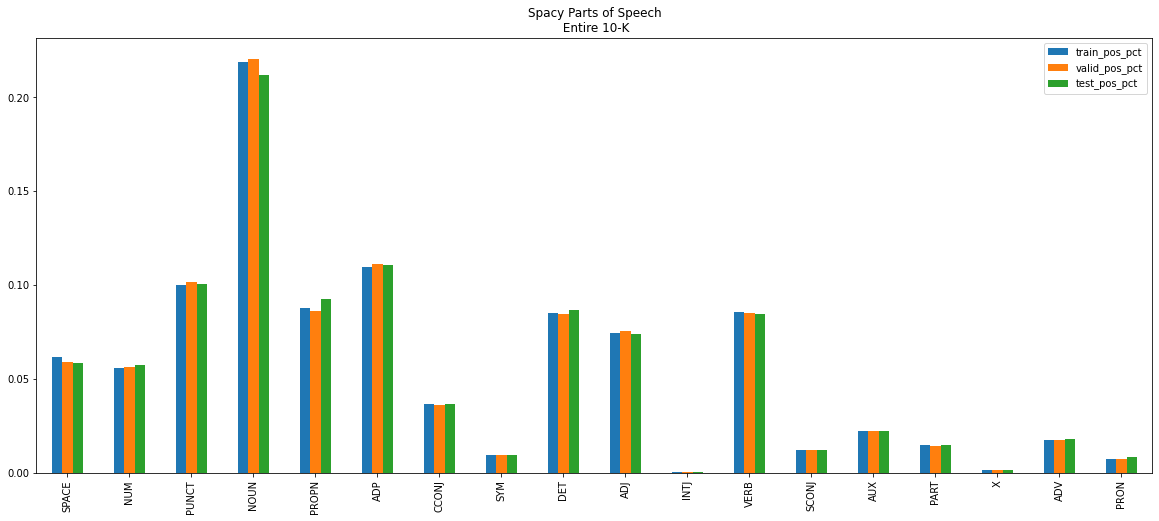

In [ ]:
pos_pct_df.plot(kind='bar', figsize=(20,8), title='Spacy Parts of Speech\n Entire 10-K')

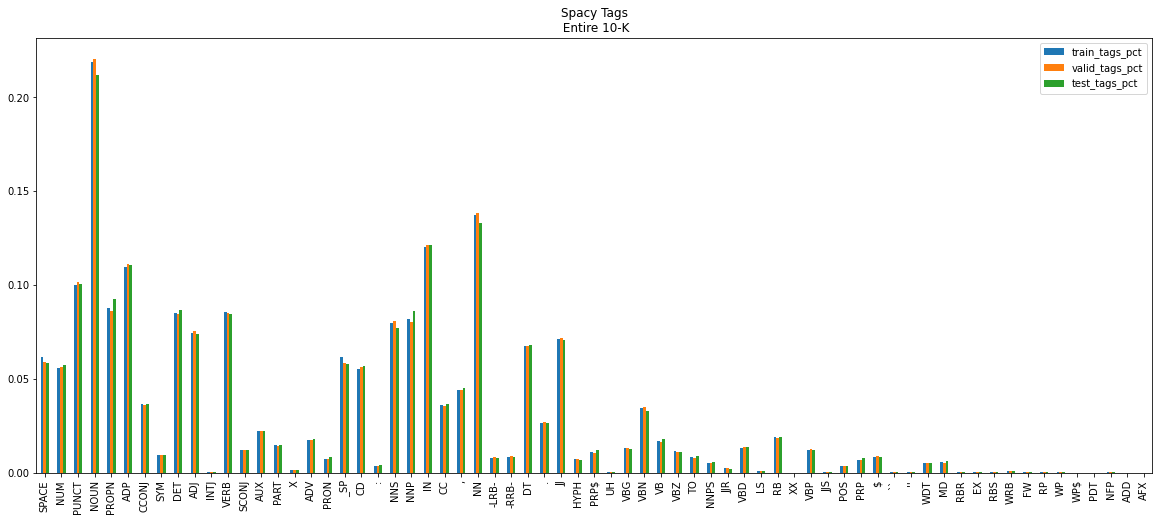

In [ ]:
tags_pct_df.plot(kind='bar', figsize=(20,8), title='Spacy Tags\n Entire 10-K')

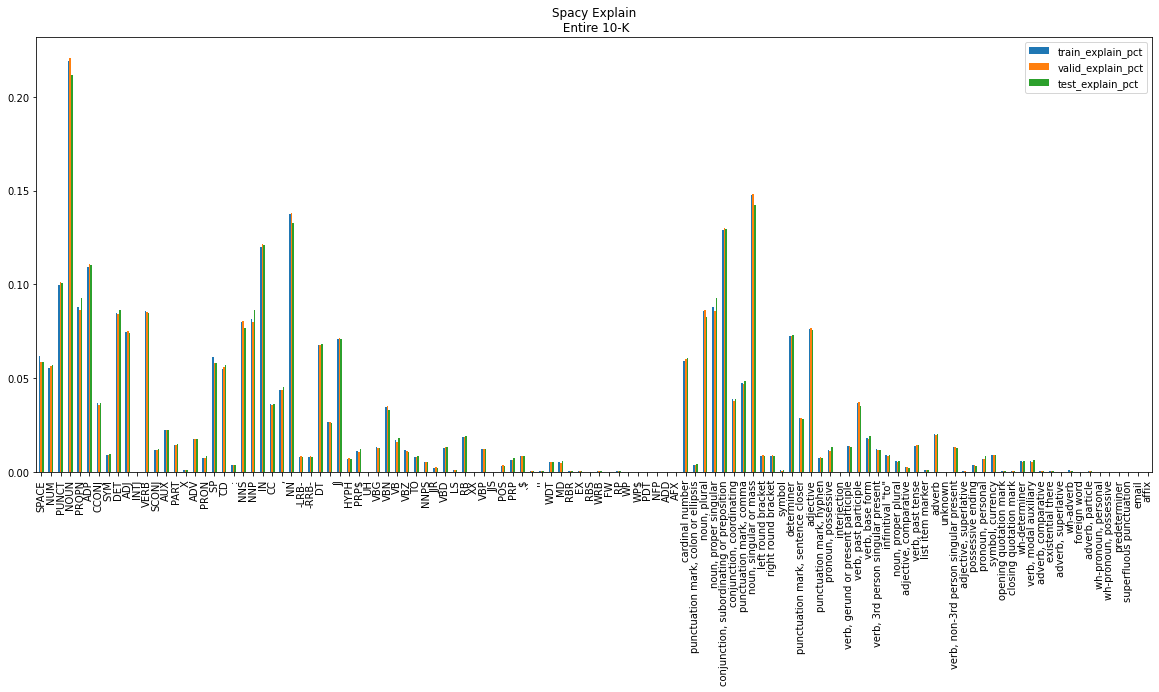

In [ ]:
explain_pct_df.plot(kind='bar', figsize=(20,8), title='Spacy Explain\n Entire 10-K')

Text(0.5, 0, 'Spacy Parts of Speech')

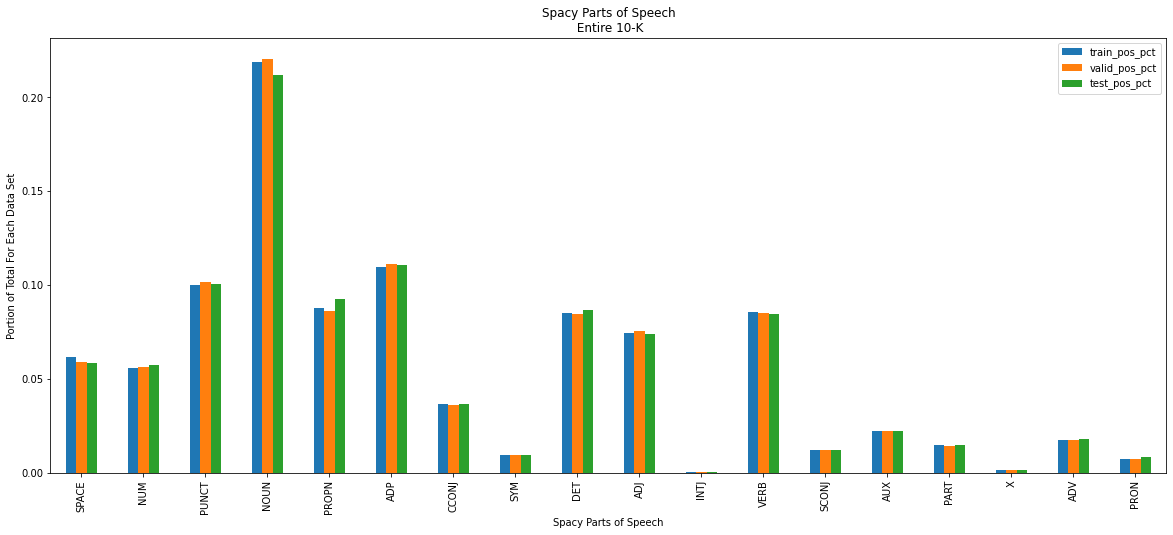

In [ ]:
ax = pos_pct_df.plot(kind='bar', figsize=(20,8), title='Spacy Parts of Speech\n Entire 10-K')
ax.set_ylabel('Portion of Total For Each Data Set')
ax.set_xlabel('Spacy Parts of Speech')
#ax.yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

Text(0.5, 0, 'Spacy Tags')

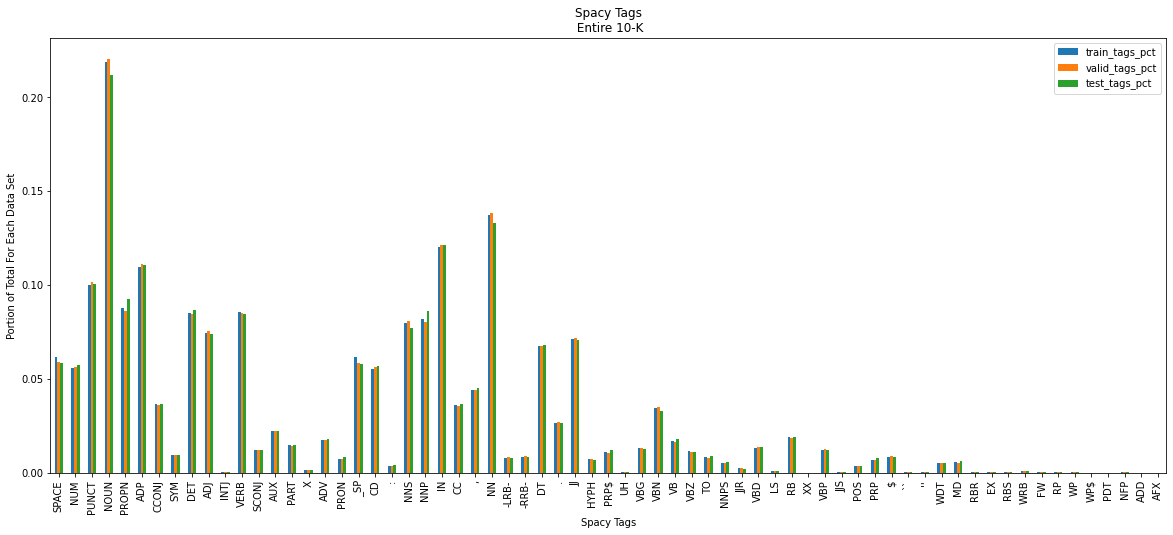

In [ ]:
ax = tags_pct_df.plot(kind='bar', figsize=(20,8), title='Spacy Tags\n Entire 10-K')
ax.set_ylabel('Portion of Total For Each Data Set')
ax.set_xlabel('Spacy Tags')

Text(0.5, 0, 'Spacy Explain')

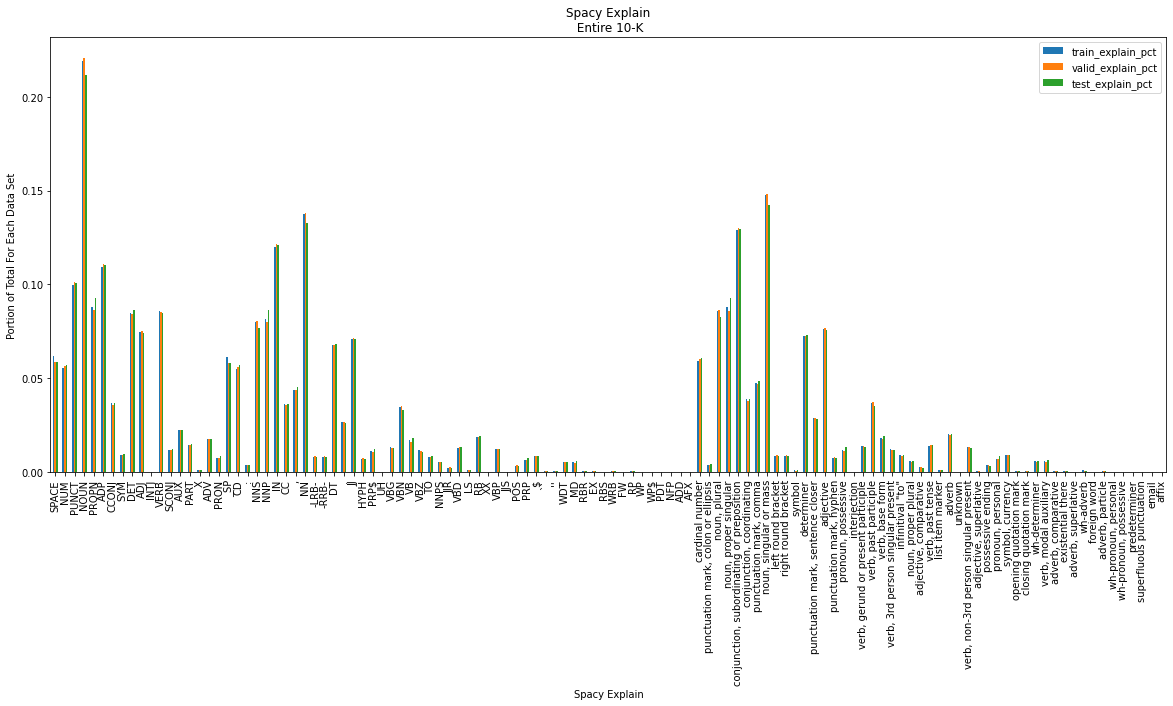

In [ ]:
ax = explain_pct_df.plot(kind='bar', figsize=(20,8), title='Spacy Explain\n Entire 10-K')
ax.set_ylabel('Portion of Total For Each Data Set')
ax.set_xlabel('Spacy Explain')

In [ ]:
sent_len_col = train_df2.columns.get_loc('sentences_length')
all_sent_len = [1,2]
for index, row in train_df2.iterrows():
  if train_df2.iloc[0, sent_len_col]!='':
    temp_s = train_df2.iloc[index, sent_len_col].split()
    temp_s2 = [int(i) for i in temp_s]
    all_sent_len.extend(temp_s2)

In [ ]:
type(all_sent_len)

list

In [ ]:
len(all_sent_len)

565475

In [ ]:
all_sent_len[:5]

[1, 2, 3, 2, 14]

Text(0.5, 1.0, 'Histogram of Length of Sentences\nRange of 1 to 100\n Entire 10-K')

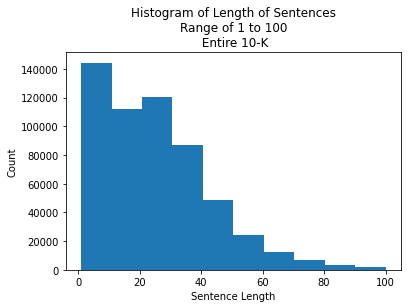

In [ ]:
figure = plt.figure(1)
plt.hist(all_sent_len, range=(1,100))
plt.xlabel('Sentence Length')
plt.ylabel('Count')
plt.title('Histogram of Length of Sentences\nRange of 1 to 100\n Entire 10-K')

(array([0.02600341, 0.02070576, 0.02153737, 0.01536214, 0.00878313,
        0.00440774, 0.00219465, 0.00115791, 0.00055859, 0.00029942]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

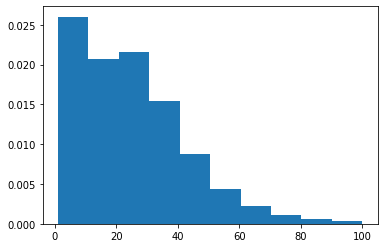

In [ ]:
plt.hist(all_sent_len, density=True, range=[1, 100])

(array([5.63347e+05, 1.62600e+03, 2.87000e+02, 8.50000e+01, 5.80000e+01,
        4.20000e+01, 1.40000e+01, 5.00000e+00, 3.00000e+00, 8.00000e+00]),
 array([1.0000e+00, 1.1840e+02, 2.3580e+02, 3.5320e+02, 4.7060e+02,
        5.8800e+02, 7.0540e+02, 8.2280e+02, 9.4020e+02, 1.0576e+03,
        1.1750e+03]),
 <a list of 10 Patch objects>)

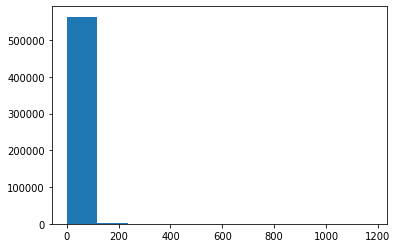

In [ ]:
sent_len_col = test_df2.columns.get_loc('sentences_length')
all_sent_len = [1,2]
for index, row in test_df2.iterrows():
  if test_df2.iloc[0, sent_len_col]!='':
    temp_s = test_df2.iloc[index, sent_len_col].split()
    temp_s2 = [int(i) for i in temp_s]
    all_sent_len.extend(temp_s2)
#plt.hist(all_sent_len, density=True, bins=10)
plt.hist(all_sent_len, bins=10)

(array([8.48583298e-03, 2.44928338e-05, 4.32315086e-06, 1.28037569e-06,
        8.73668117e-07, 6.32656223e-07, 2.10885408e-07, 7.53162170e-08,
        4.51897302e-08, 1.20505947e-07]),
 array([1.0000e+00, 1.1840e+02, 2.3580e+02, 3.5320e+02, 4.7060e+02,
        5.8800e+02, 7.0540e+02, 8.2280e+02, 9.4020e+02, 1.0576e+03,
        1.1750e+03]),
 <a list of 10 Patch objects>)

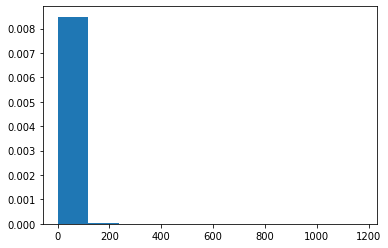

In [ ]:
plt.hist(all_sent_len, density=True, bins=10, )

In [ ]:
set(all_sent_len)
len(all_sent_len)

565475

(array([0.02596224, 0.02013055, 0.02166464, 0.01570094, 0.00876481,
        0.00439274, 0.00227595, 0.00120461, 0.00058918, 0.00032444]),
 array([  1. ,  10.9,  20.8,  30.7,  40.6,  50.5,  60.4,  70.3,  80.2,
         90.1, 100. ]),
 <a list of 10 Patch objects>)

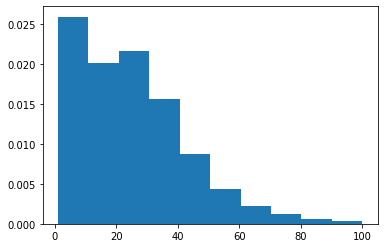

In [ ]:
plt.hist(all_sent_len, density=True,  range=[1, 100])

In [ ]:
sent_len_col = train_df2.columns.get_loc('sentences_length')
z = train_df2.iloc[0, sent_len_col].split()
z2 = [int(i) for i in z]
z2
#type(train_df2.iloc[0, sent_len_col])

[151,
 11,
 52,
 46,
 61,
 61,
 6,
 27,
 46,
 132,
 40,
 38,
 130,
 26,
 32,
 24,
 32,
 36,
 36,
 45,
 43,
 37,
 36,
 27,
 34,
 84,
 53,
 10,
 35,
 33,
 29,
 60,
 26,
 9,
 6,
 26,
 21,
 35,
 118,
 37,
 27,
 35,
 53,
 50,
 26,
 56,
 21,
 115,
 55,
 26,
 49,
 62,
 16,
 58,
 71,
 27,
 28,
 32,
 51,
 55,
 33,
 22,
 40,
 33,
 31,
 35,
 34,
 41,
 52,
 45,
 27,
 20,
 39,
 32,
 63,
 81,
 37,
 26,
 67,
 22,
 29,
 37,
 43,
 47,
 14,
 33,
 33,
 30,
 62,
 48,
 24,
 22,
 34,
 28,
 45,
 18,
 33,
 17,
 8,
 4,
 18,
 46,
 34,
 25,
 44,
 35,
 35,
 33,
 37,
 38,
 18,
 32,
 38,
 7,
 48,
 23,
 40,
 18,
 25,
 35,
 27,
 31,
 6,
 38,
 32,
 24,
 21,
 42,
 39,
 43,
 43,
 41,
 18,
 45,
 61,
 45,
 63,
 19,
 6,
 21,
 29,
 17,
 64,
 19,
 32,
 42,
 39,
 46,
 23,
 29,
 31,
 44,
 17,
 28,
 39,
 40,
 32,
 33,
 36,
 17,
 47,
 17,
 34,
 33,
 31,
 27,
 27,
 23,
 22,
 45,
 35,
 23,
 93,
 31,
 27,
 26,
 26,
 30,
 31,
 83,
 30,
 41,
 42,
 45,
 45,
 59,
 50,
 6,
 56,
 31,
 17,
 33,
 35,
 41,
 72,
 13,
 36,
 28,
 32,
 4,
 22,


In [ ]:
train_df2.iloc[1027, sent_len_col]
#train_df2[train_df2.sentences_length=='']

'56 32 285 14 3 8 36 42 27 47 30 29 26 139 71 19 29 42 41 21 14 68 30 38 41 41 41 1 49 26 12 12 12 34 18 61 59 36 56 11 11 26 1 10 21 24 9 14 5 20 38 22 70 59 42 42 89 51 61 1 26 42 31 17 46 27 27 85 38 38 10 33 26 4 10 8 4 21 66 68 36 1 47 40 77 1 53 27 34 35 35 51 57 4 25 29 33 40 6 2 68 1 57 28 53 41 16 14 10 39 63 35 51 43 68 34 16 25 42 37 26 29 10 10 40 15 15 15 15 15 15 35 17 29 12 45 51 29 29 49 8 53 10 50 15 33 50 45 52 56 27 7 15 6 40 2 7 34 7 8 24 50 15 13 5 3 2 20 13 17 16 47 47 48 23 39 39 1 44 3 39 15 13 38 13 33 43 58 1 17 31 56 21 50 42 7 20 18 3 23 19 272 3 61 21 8 4 51 37 32 32 48 24 50 29 5 23 3 35 32 41 31 18 18 52 29 44 9 52 40 45 43 52 23 29 2 41 35 19 35 25 36 38 3 29 8 33 5 41 20 25 54 29 42 42 27 26 46 59 31 31 16 24 13 32 18 35 41 75 2 19 31 43 43 26 4 15 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 3 8 5 5 12 2 4 11 2 34 59 33 12 25 3 32 16 13 4 19 24 22 37 23 56 41 42 46 46 22 42 72 24 132 24 27 

In [ ]:
train_df2.columns

Index([                               'index',
                                 'Unnamed: 0',
                                 'origin_idx',
                                        'CIK',
                                       'date',
                            'total_esg_score',
        'total_esg_score_quarter_change_pure',
         'total_esg_score_quarter_change_pct',
       'governance_score_quarter_change_pure',
        'governance_score_quarter_change_pct',
       ...
                        'adverb, superlative',
                               'foreign word',
                               'interjection',
                                    'unknown',
                    'superfluous punctuation',
                                      'email',
                                      'affix',
                                  'POS_total',
                                 'tags_total',
                              'explain_total'],
      dtype='object', length=146)

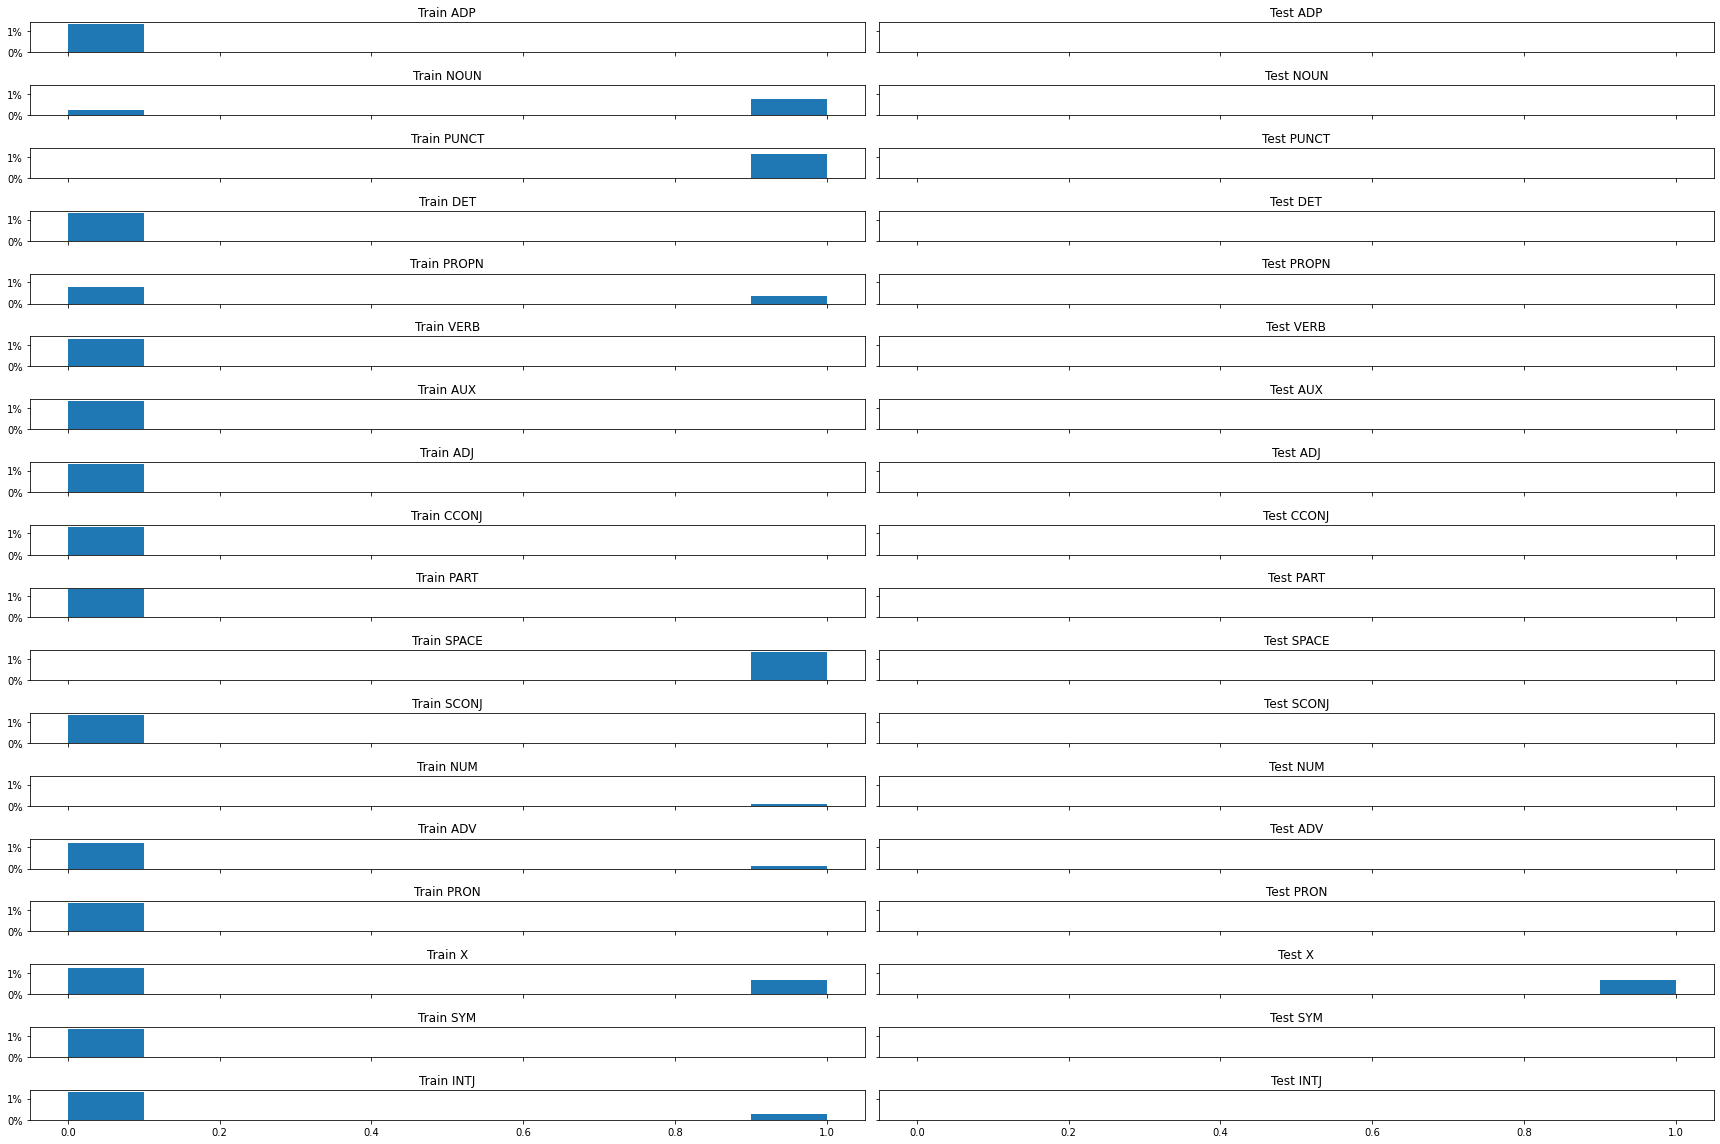

In [ ]:
fig, ax = plt.subplots(len(pos_cols), 2, figsize=(24,16),sharex=True, sharey=True)

bins = [i/10 for i in range(11)]

i = 0
r = 0
for col_name in pos_cols:
  #Train
  ax[r,0].hist(train_df2[col_name],
          weights=np.zeros_like(train_df2[col_name]) + 1. / train_df2[col_name].size * 100,
          bins=bins)
  ax[r,0].set_title('Train '+col_name)
  #ax[r,0].set_xlabel('Cosine')
  ax[r,0].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))

  #Test
  ax[r,1].hist(test_df2[col_name],
          weights=np.zeros_like(test_df2[col_name]) + 1. / test_df2[col_name].size * 100,
          bins=bins)
  ax[r,1].set_title('Test '+col_name)
  #ax[r,0].set_xlabel('Cosine')
  ax[r,1].yaxis.set_major_formatter(mtick.PercentFormatter(decimals=0))
  r += 1

plt.tight_layout()

#### Encoding

In [ ]:
import tensorflow as tf
import tensorflow_hub as hub
from nltk.tokenize import sent_tokenize

In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
new_sentences = ["The Company announced that it is on track to meet goals to further reduce emissions from its operations, including a _NUMBER_-percent decrease in methane emissions and a _NUMBER_-percent reduction in flaring by year-end _NUMBER_ help meet society's ambition for a lower-carbon future.",
                 "The Company is making significant investments in renewablec energy and sustainability initiatives: Running on _NUMBER_% renewable energy by _NUMBER_. The company has over _NUMBER_ renewable energy projects that saved more than _NUMBER_,_NUMBER_ tons of packaging material.",
                 "The Company demonstrates corporate leadership on climate change by setting strong goals and taking purposeful action in and outside our company. Our climate change strategy is based on mitigation, resilience and enablement. Progress Toward Energy Intensity Reduction, Emissions Reduction, Refurbish, Reuse, Recycle",
                 "The Company has not made investments in renewable energy and sustainability initiatives and risks not meeting EPA suggestions.",
                 "The Board failed to establish a Public Policy and Sustainability Committee in _NUMBER_ which causes concern over key sustainability and public policy matters.",
                 "The Company has further increased emissions and holds environmental liability."
]

In [ ]:
module_url = "https://tfhub.dev/google/universal-sentence-encoder/4" 
use_model = hub.load(module_url)
print ("module %s loaded" % module_url)

module https://tfhub.dev/google/universal-sentence-encoder/4 loaded


In [ ]:
def cosine(u, v):
    return np.dot(u, v) / (np.linalg.norm(u) * np.linalg.norm(v))

In [ ]:
def top_3_sents_use(s):
  dict_for_sents = {}
  tokenized_sents = sent_tokenize(s)
  for sent in tokenized_sents:
    sims = []
    for c in new_sentences:
      sim = cosine(use_model([c])[0], use_model([sent])[0])
      sims.append(abs(sim))
    dict_for_sents[sent] = np.max(sims)
  return ' '.join([k[0] for k in sorted(dict_for_sents.items(), key=lambda item: item[1])[-3:]])